## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
from sklearn.preprocessing import OneHotEncoder
if X.isnull().values.any():
    print("В матрице есть пропущенные значения")
else:
    print("Сегодня без пропусков")
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) == 0:
    print("Нет категорий")
else:
  print("Все печально, надо работать")

Сегодня без пропусков
Нет категорий


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(40)

#stratify нужно чтобы у нас были сбалансирована тестовая и обучающая выборка
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, shuffle=True)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [6]:
Xh = X[['alcohol', 'magnesium']]
X_train, X_test, y_train, y_test = train_test_split(Xh, y, test_size = 0.3, stratify = y, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("NN", "Train", "Test")
class1 = KNeighborsClassifier(n_neighbors=1)
class1.fit(X_train_scaled, y_train)
class3 = KNeighborsClassifier(n_neighbors=3)
class3.fit(X_train_scaled, y_train)
class5 = KNeighborsClassifier(n_neighbors=5)
class5.fit(X_train_scaled, y_train)
class10 = KNeighborsClassifier(n_neighbors=10)
class10.fit(X_train_scaled, y_train)
class15 = KNeighborsClassifier(n_neighbors=15)
class15.fit(X_train_scaled, y_train)
class25 = KNeighborsClassifier(n_neighbors=25)
class25.fit(X_train_scaled, y_train)

y_pred_train = class1.predict(X_train_scaled)
y_pred_test = class1.predict(X_test_scaled)
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print(1, round(ac1,2), round(ac2,2))

y_pred_train = class3.predict(X_train_scaled)
y_pred_test = class3.predict(X_test_scaled)
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print(3, round(ac1,2), round(ac2,2))

y_pred_train = class5.predict(X_train_scaled)
y_pred_test = class5.predict(X_test_scaled)
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print(5, round(ac1,2), round(ac2,2))

y_pred_train = class10.predict(X_train_scaled)
y_pred_test = class10.predict(X_test_scaled)
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print(10, round(ac1,2), round(ac2,2))

y_pred_train = class15.predict(X_train_scaled)
y_pred_test = class15.predict(X_test_scaled)
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print(15, round(ac1,2), round(ac2,2))

y_pred_train = class25.predict(X_train_scaled)
y_pred_test = class25.predict(X_test_scaled)
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print(25, round(ac1,2), round(ac2,2))

NN Train Test
1 0.99 0.65
3 0.84 0.63
5 0.81 0.63
10 0.75 0.65
15 0.74 0.59
25 0.76 0.57


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [7]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [9]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

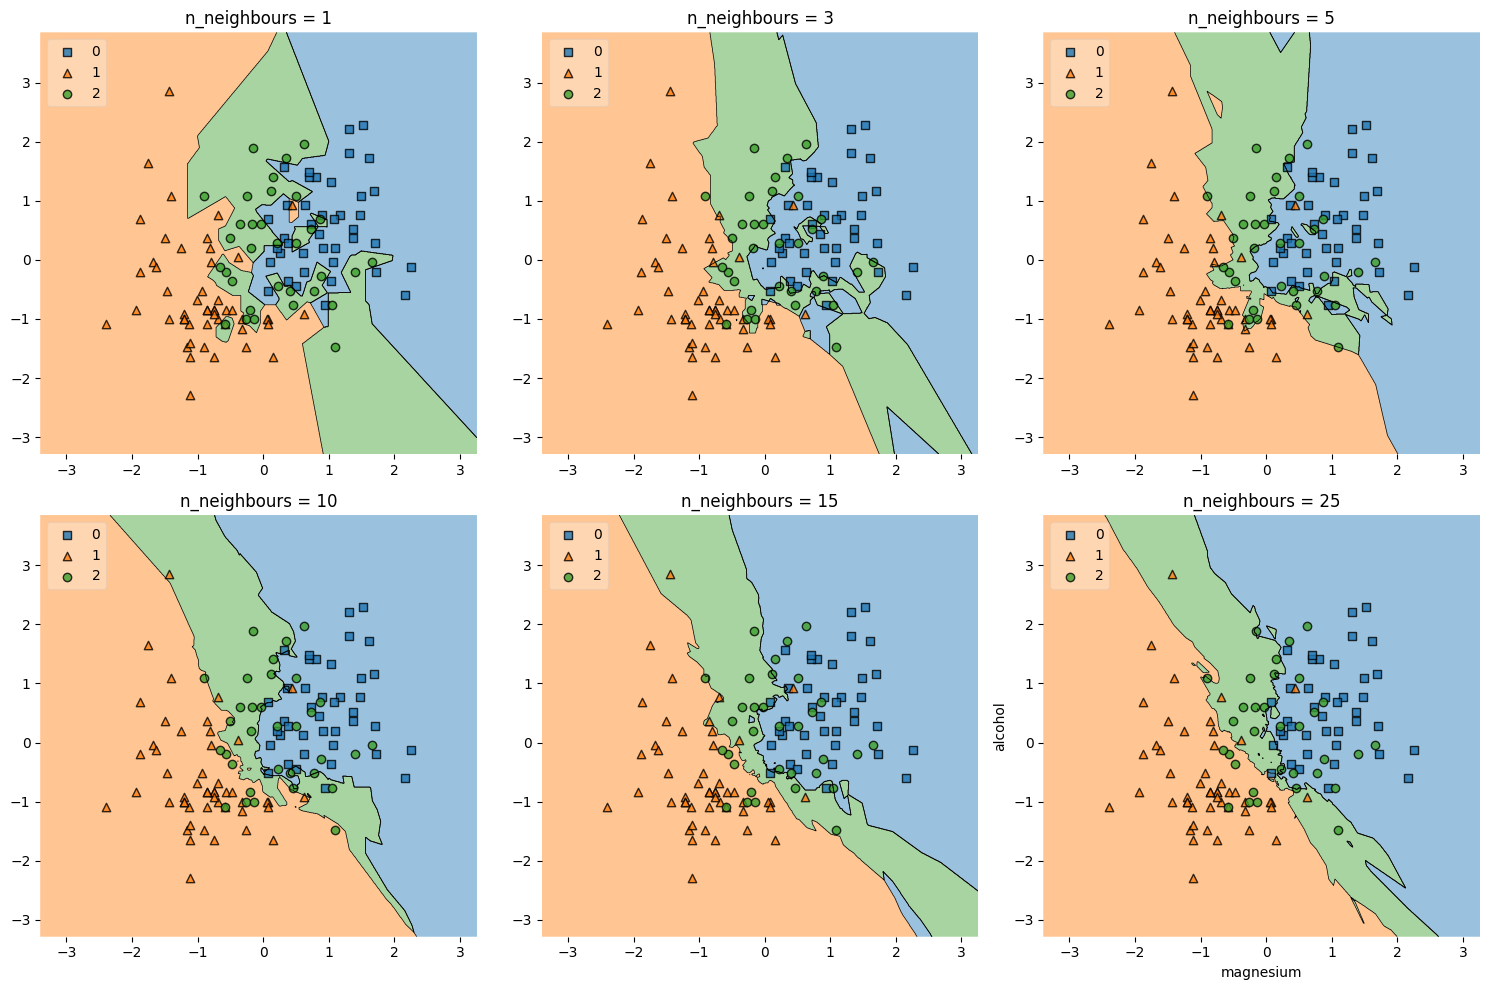

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
classifiers = [class1, class3, class5, class10, class15, class25]
titles = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5',
          'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, title, ax in zip(classifiers, titles, axes.flatten()):
    plot_decision_regions(X_train_scaled, y_train, clf=clf, legend=2, ax=ax)
    ax.set_title(title)
    plt.xlabel('magnesium')
    plt.ylabel('alcohol')
plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

среди представленных K, кажется, наиболее оптимальным является k = 5. Если смотреть на 1.3, до K = 5 идет возрастание процента верных предположений, далее идет убывание. Если смотреть на 1.5, однозначно можно сказать, что на K = 1 произошло переобучение - модель "прыгает" к каждому значению, что не очень хорошо. Также можно сказать, что на К = 3 происходит что-то похожее, но уже лучше. После K = 5 слишком много ошибок даже на тестовой выборке

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

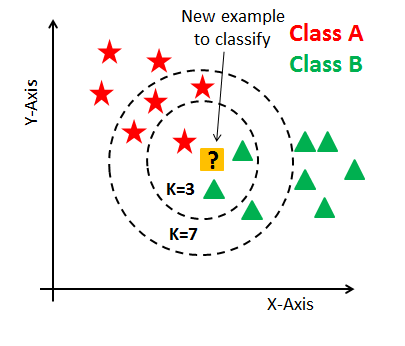

In [11]:
import numpy as np
from collections import Counter

In [12]:
class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y.astype(int)

    def count_distance(self, x, y):
        return np.sqrt(np.sum((y-x) *(y-x)))

    def predict(self, X):
        predictions = []
        for i in X:
            distances = []
            for j in self.X_train:
                distances.append(self.count_distance(j, i))
            k_index = np.argsort(distances)[:self.k]
            kNL = [self.y_train[idx] for idx in k_index]
            mCom = Counter(kNL).most_common(1)
            predictions.append(mCom[0][0])
        return np.array(predictions)



In [13]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [14]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [15]:
data = pd.read_csv('https://drive.google.com/uc?id=1XOcj0lmf31px51l7NSzla5ZccX9iQQzY')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [16]:
# номер, глубина и table не несут особенной инфы - глубина считается на основе других столбцов, номер - ну номер... table тоже зависит от других столбцов

if data.isnull().values.any():
    print("В матрице есть пропущенные значения")
else:
    print("Сегодня без пропусков")
unique_counts = data.nunique()
single_value_columns = unique_counts[unique_counts == 1].index
if (len(single_value_columns)>0):
  print('Есть столбец с 1 значением')
else:
  print('Вся инфа полезная')
data.drop(['depth', 'table', 'Unnamed: 0'], axis= 1 , inplace= True)


Сегодня без пропусков
Вся инфа полезная


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [17]:
import seaborn as sns
%matplotlib inline

<ipython-input-18-d7ab03b83532>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

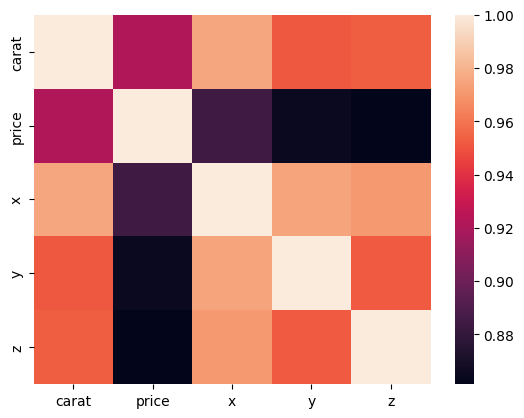

In [18]:
numeric_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix)

в целом, коррелируют все признаки, которые остались, больше всего карат с прайсом

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [19]:
data = pd.get_dummies(data, columns=['cut', 'color','clarity'])
data.head(5)

,carat,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,3.98,2.43,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,4.07,2.31,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [20]:
XData = data.drop(columns=['price'])
yData = data['price']

X_train, X_test, y_train, y_test = train_test_split(XData, yData, test_size=0.3, shuffle=True)
# стратифай невозможно применить, так как цена везде разная

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
ytr = linear_reg.predict(X_train_scaled)
yte= linear_reg.predict(X_test_scaled)

tr = np.mean((y_train - ytr) ** 2)
te = np.mean((y_test - yte) ** 2)
print (tr, te)

1279844.3459671685 1287206.6012603715


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [25]:
ceff = linear_reg.coef_
for i, coef in enumerate(ceff):
    print(XData.columns[i], coef)

carat 5247.507874558241
x -974.7744637220369
y 35.26666680403829
z -131.58007682493448
cut_Fair -149.5431692591782
cut_Good -61.47518882995265
cut_Ideal 75.44573830356063
cut_Premium 14.635118553062695
cut_Very Good -0.4320918972759812
color_D 205.62770978233263
color_E 161.9381609891342
color_F 136.7740588944336
color_G 63.70203768652693
color_H -123.90780292454224
color_I -255.8344297479871
color_J -389.36941730262544
clarity_I1 -466.8239144580748
clarity_IF 236.96567739273252
clarity_SI1 -151.5157646035081
clarity_SI2 -491.38614340036685
clarity_VS1 202.02522041328422
clarity_VS2 102.91602203782669
clarity_VVS1 258.81686886759803
clarity_VVS2 274.05984522429605


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [26]:
from sklearn.linear_model import Lasso, Ridge

In [31]:
lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X_train_scaled, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled, y_train)

lasso_reg.coef_, ridge_reg.coef_
#ну не сильно уменьшились, особенно в ридже. Получается, не сильная проблема

(array([4790.68440801, -541.90243695,   -0.        ,  -93.12910183,
        -141.45306324,  -56.45500293,   62.80144473,    0.        ,
          -0.        ,  135.67079338,   84.64405408,   59.67719154,
          -0.        , -172.41556845, -288.64205109, -408.59711807,
        -481.8695631 ,  185.10277554, -256.20832896, -574.57340171,
         100.20626078,   -0.        ,  190.5908797 ,  195.57044561]),
 array([ 5.21177276e+03, -9.37272705e+02,  3.20101794e+01, -1.31132856e+02,
        -1.49157864e+02, -6.12984036e+01,  7.52990084e+01,  1.43708647e+01,
        -2.63170286e-01,  2.05332357e+02,  1.61641413e+02,  1.36340975e+02,
         6.34694696e+01, -1.23622754e+02, -2.55175624e+02, -3.88603204e+02,
        -4.66269026e+02,  2.37271632e+02, -1.51944985e+02, -4.91226523e+02,
         2.01784428e+02,  1.02738597e+02,  2.59216868e+02,  2.74271534e+02]))

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [32]:
alphas = [0.1, 1, 10, 100, 200]

for a in alphas:
    l = Lasso(alpha=a)
    r = Ridge(alpha=a)

    l.fit(X_train_scaled, y_train)
    r.fit(X_train_scaled, y_train)

    print(a, "lasso", np.linalg.norm(l.coef_))
    print(a, "ridge", np.linalg.norm(r.coef_))

# агрессивнее уменьшает лассо

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.467e+08, tolerance: 5.986e+07
  model = cd_fast.enet_coordinate_descent(


0.1 lasso 5443.858883200927
0.1 ridge 5439.508612142113
1 lasso 5390.384604045481
1 ridge 5435.744804118973
10 lasso 4933.163958593282
10 ridge 5398.635019409804
100 lasso 3953.6030818790173
100 ridge 5072.950410270057
200 lasso 3630.8727402149852
200 ridge 4784.3950603437415


**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [33]:
from sklearn.linear_model import LassoCV

In [34]:
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)
for i, alpha in enumerate(lasso_cv.alphas_):
    print(alpha, lasso_cv.mse_path_[:, i], lasso_cv.mse_path_[:, i].mean())

200.0 [1975038.0383968  1540270.12276502 1284874.05301774 1271893.81056469
 1271419.74508605] 1468699.1539660613
100.0 [1937133.44395872 1538395.41009004 1319998.3602371  1313410.7664373
 1313478.28968818] 1484483.2540822686
10.0 [1962492.46243724 1548630.99100867 1320795.84246497 1310744.16976075
 1310528.98488746] 1490638.490111818
1.0 [1869779.44667703 1451000.0400626  1209979.96439205 1184365.75929191
 1186039.44740088] 1380232.9315648945
0.1 [1957182.34427607 1550891.67996982 1348866.07122078 1368531.06557747
 1373153.59932477] 1519724.952073782


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [35]:
l = Lasso(alpha=1)
l.fit(X_train_scaled, y_train)
for feature, weight in zip(X_train.columns, l.coef_):
    print(feature, weight)

carat 5202.177622675467
x -909.3322948340181
y 5.996530383798283
z -125.07899211640796
cut_Fair -154.02915329331904
cut_Good -69.29698756751985
cut_Ideal 60.01494965570439
cut_Premium 0.0
cut_Very Good -12.038283719575174
color_D 152.10559122730209
color_E 100.4286778178397
color_F 75.4688401822525
color_G -0.0
color_H -179.51191304421522
color_I -301.3085655945367
color_J -422.690156188501
clarity_I1 -494.31735879561984
clarity_IF 191.80422648213056
clarity_SI1 -256.2855286822579
clarity_SI2 -582.5331506269958
clarity_VS1 113.03822924038501
clarity_VS2 -0.0
clarity_VVS1 195.94331772224976
clarity_VVS2 202.04320193132176


наибольший вес у карата, так как фактически это больше всего влияет на цену.
Среднее значение категориальных признаков 0, так как они ну средние, хуже с отрицательным весов, лучше с положительным

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
y_pred = l.predict(X_test_scaled)
mse = np.mean((y_test -y_pred)**2)
mse, te


(1287950.1881653627, 1287206.6012603715)

ну... они почти одинаковые. Первая как будто чуть чуть получше, так что надо использовать ее. Возможно так случилось, потому что кэф регулязации слишком сильно сглаживает веса, поэтому да